In [1]:
import qutip as qutip

import os
import time
import math
import numpy as np
from numpy.linalg import svd as svd
import multiprocessing

from matplotlib import pyplot as plt

import sys
import os
#from multiprocessing import Pool
from itertools import product
sys.path.append('../../../utils')

from tomography import coherent_state_tomography as cst
from tomography import coherent_state_tomography_copy as cst2
from visualization import state_visualization as state_vis
from quantum_utils import quantum_optics_utils as qou

from mpl_toolkits.mplot3d.axes3d import Axes3D
from math_utils import statistics_utils as su

In [8]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [4]:
# Define a simple entangled outer product state of 2 qubits
state_0 = qutip.basis(2, 0)
state_1 = qutip.basis(2, 1)
joint_state = qutip.tensor(state_0, state_1)
joint_state = joint_state * joint_state.dag()

In [16]:
print(joint_state[3][0][3])

0j


In [19]:
# TIME COST BENCHMARKING OF 2 PHOTON MLE

# Generate the histogram in advance, we're not trying to actually do correct MLE
dim = 2
mesh_size = 0.5
max_x = 2

povm, alphas, xs, ps = cst2.generate_coherent_state_POVM(max_x, 
                                                          mesh_size, 
                                                          dim,
                                                          cutoff=0)

state_0 = qutip.basis(dim, 0)
state_1 = qutip.basis(dim, 1)
input_state = (qutip.tensor(state_0, state_0) + qutip.tensor(state_1, state_1)).unit()
input_rho = input_state * input_state.dag()

histogram_4D = qou.generate_joint_2_photon_quadrature_histogram(input_rho, dim, povm)

times = []
dims = [3, 5, 10, 15, 20, 30, 50, 100]
for dim in dims:
    # Generate a single coherent state povm
    povm, alphas, xs, ps = cst2.generate_coherent_state_POVM(max_x, 
                                                              mesh_size, 
                                                              dim,
                                                              cutoff=0)
    # Test MLE for an entangled Bell state
    number_of_mle_iterations = 10
    s = time.time()
    reconstructed_bell_state, bell_state_lls = \
        cst2.perform_coherent_state_MLE(
            povm,
            histogram_4D, 
            number_of_mle_iterations,
            frequency_threshold=0,
            cutoff=0,
            identity_mixin=0,
            number_of_photons=2)
    e = time.time()
    print('Time for MLE reconstruction for dim = ' + str(dim) + ': ' + str(e - s) + ' s')
    times.append(e - s)

Time for MLE reconstruction for dim = 3: 26.19579005241394 s
Time for MLE reconstruction for dim = 5: 27.926878929138184 s
Time for MLE reconstruction for dim = 10: 67.54033517837524 s
Time for MLE reconstruction for dim = 15: 304.1700031757355 s
Time for MLE reconstruction for dim = 20: 1134.9510519504547 s
Time for MLE reconstruction for dim = 30: 2563.941768169403 s
Time for MLE reconstruction for dim = 50: 19162.409893989563 s


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


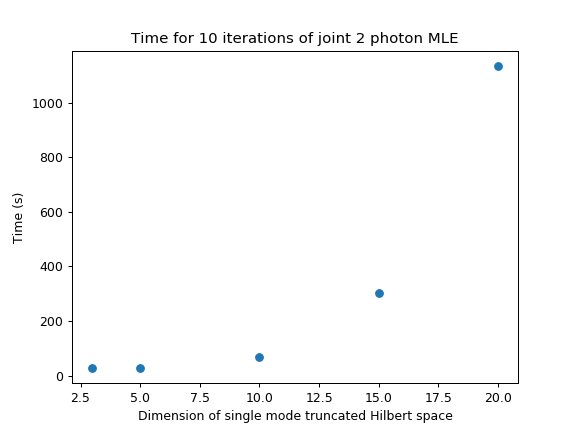

Text(0, 0.5, 'Time (s)')

In [22]:
# 26.19579005241394 s
# Time for MLE reconstruction for dim = 5: 27.926878929138184 s
# Time for MLE reconstruction for dim = 10: 67.54033517837524 s
# Time for MLE reconstruction for dim = 15: 304.1700031757355 s
# Time for MLE reconstruction for dim = 20: 1134.9510519504547 s
# Time for MLE reconstruction for dim = 30: 2563.941768169403 s
dims = [3, 5, 10, 15, 20, 30, 50]
times = [26.20, 27.93, 67.54, 304.17, 1134.95, 2563.94, 19162]
fig, ax = plt.subplots()
ax.scatter(dims[:-2], times[:-2])
ax.set_title('Time for 10 iterations of joint 2 photon MLE')
ax.set_xlabel('Dimension of single mode truncated Hilbert space')
ax.set_ylabel('Time (s)')



In [15]:
# Parallel processing tests
numToFactor = 49

def isFactor(x, y):
    return x * y

if __name__ == '__main__':
    pool = Pool(processes=50)
    possibleFactors = range(1,int(np.floor(np.sqrt(numToFactor)))+1)
    print ('Checking ', possibleFactors)
    result = pool.starmap(isFactor, product(possibleFactors, repeat=2))
    print(result)
    pool.close()

Checking  range(1, 8)
[1, 2, 3, 4, 5, 6, 7, 2, 4, 6, 8, 10, 12, 14, 3, 6, 9, 12, 15, 18, 21, 4, 8, 12, 16, 20, 24, 28, 5, 10, 15, 20, 25, 30, 35, 6, 12, 18, 24, 30, 36, 42, 7, 14, 21, 28, 35, 42, 49]


In [9]:
print(povm)

[[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.28809967+0.j       0.065968  -0.065968j]
 [0.065968  +0.065968j 0.03021022+0.j      ]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.20430118+0.j         0.09157052-0.12209403j]
 [0.09157052+0.12209403j 0.1140087 +0.j        ]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.12128428+0.j         0.06913192-0.13826383j]
 [0.06913192+0.13826383j 0.19702561+0.j        ]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.07070213+0.j         0.03209031-0.12836124j]
 [0.03209031+0.12836124j 0.24760775+0.j        ]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.05512433+0.j         0.        -0.12044886j]
 [0.        +0.12044886j 0.26318556+0.j        ]], Quantum object: dims = [[2], [2]], shape = (2, 2), type 

In [93]:
# Generate the histogram in advance, we're not trying to actually do correct MLE
dim = 10
mesh_size = 0.5
max_x = 2

s = time.time()
povm, alphas, xs, ps = cst2.generate_coherent_state_POVM(max_x, 
                                                          mesh_size, 
                                                          dim,
                                                          cutoff=0)
e = time.time()
print('Generating the POVM took ' + str(e - s) + ' seconds')

state_0 = qutip.basis(dim, 0)
qfunc = qutip.qfunc(state_0, xs, ps, g=2)

Generating the POVM took 0.2157609462738037 seconds


In [87]:
s = time.time()
R = cst2.MLE_evaluate_R_parallel(state_0*state_0.dag(),
                            povm, 
                            qfunc,
                            frequency_threshold=0,
                            data_threshold=0,
                            cutoff=0,
                            num_processes=1)
e = time.time()
print('Parallel computation of R matrix took ' + str(e - s) + ' seconds for dimension ' + str(dim))

Parallel computation of R matrix took 0.2812199592590332 seconds for dimension 10


In [16]:
print(R)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[   3.99071313    0.        ]
 [   0.         1994.74045555]]


In [88]:
s = time.time()
R2 = cst2.MLE_evaluate_R(state_0*state_0.dag(),
                        povm, 
                        qfunc,
                        frequency_threshold=0,
                        data_threshold=0,
                        cutoff=0)
e = time.time()
print('Synchronous computation of R matrix took ' + str(e - s) + ' seconds for dimension ' + str(dim))

Synchronous computation of R matrix took 0.2191617488861084 seconds for dimension 10


In [55]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

A_flat = [a for ra in A for a in ra]
B_flat = [a for ra in B for a in ra]
print(A_flat)

for x in product(A_flat, B_flat, repeat=1):
    print(x)

[1, 2, 3, 4]
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(4, 5)
(4, 6)
(4, 7)
(4, 8)


In [63]:
ab = np.zeros((2, 2, 2, 2))
for i, ra in enumerate(A):
    for j, a in enumerate(ra):
        for k, rb in enumerate(B):
            for l, b in enumerate(rb):
                print(a)
                print(b)
                ab[i][j][k][l] = a * b

1
5
1
6
1
7
1
8
2
5
2
6
2
7
2
8
3
5
3
6
3
7
3
8
4
5
4
6
4
7
4
8


In [66]:
ab_flattened = [m for w in ab for y in w for z in y for m in z]
for ab_ijkl in ab_flattened:
    print(ab_ijkl)

5.0
6.0
7.0
8.0
10.0
12.0
14.0
16.0
15.0
18.0
21.0
24.0
20.0
24.0
28.0
32.0


In [110]:
# Generate the histogram in advance, we're not trying to actually do correct MLE
dim = 70
mesh_size = 0.25
max_x = 2

s = time.time()
povm, alphas, xs, ps = cst2.generate_coherent_state_POVM(max_x, 
                                                          mesh_size, 
                                                          dim,
                                                          cutoff=0)
e = time.time()
print('Generating the POVM took ' + str(e - s) + ' seconds')

state_0 = qutip.basis(dim, 0)
qfunc = qutip.qfunc(state_0, xs, ps, g=2)

state = state_0 * state_0.dag()

# Create a dummy 4D histogram
single_mode_q_function_A = qutip.qfunc(state, xs, ps, g=2)
single_mode_q_function_B = qutip.qfunc(state, xs, ps, g=2)

num_buckets = 1 + 2*int(max_x / mesh_size)
histogram = np.zeros((num_buckets, num_buckets, num_buckets, num_buckets))
for i, q_i in enumerate(single_mode_q_function_A):
    for j, q_ij in enumerate(q_i):
        for k, q_k in enumerate(single_mode_q_function_B):
            for l, q_kl in enumerate(q_k):
                histogram[i][j][k][l] = q_ij * q_kl

Generating the POVM took 2.1371400356292725 seconds


In [ ]:
state = qutip.tensor(state_0*state_0.dag(), state_0*state_0.dag())
s = time.time()
R = cst2.MLE_evaluate_R_two_photon_parallel(state,
                                            povm, 
                                            histogram,
                                            frequency_threshold=0,
                                            data_threshold=0,
                                            cutoff=0,
                                            num_processes=8)
e = time.time()
print('Parallel computation of R matrix took ' + str(e - s) + ' seconds for dimension ' + str(dim))

In [ ]:
state = qutip.tensor(state_0*state_0.dag(), state_0*state_0.dag())
s = time.time()
R = cst2.MLE_evaluate_R_two_photon(state,
                                    povm, 
                                    histogram,
                                    frequency_threshold=0,
                                    data_threshold=0,
                                    cutoff=0)
e = time.time()
print('Synchronous computation of R matrix took ' + str(e - s) + ' seconds for dimension ' + str(dim))

In [7]:
# Practicing with multiprocessing.Process()

MATRIX_SIZE = 10000
MATRIX_COUNT = 16


def rnd_matrix():
    offset = np.random.randint(1,10)
    stretch = 2*np.random.rand()+0.1
    return offset + stretch * np.random.rand(MATRIX_SIZE, MATRIX_SIZE)


print("Creating input matrices in parent process.")
# Create input in memory. Children access this input.
INPUT = [rnd_matrix() for _ in range(MATRIX_COUNT)]


def worker_function(result_queue, worker_index, chunk_boundary):
    """Work on a certain chunk of the globally defined `INPUT` list.
    """
    result_chunk = []
    for m in INPUT[chunk_boundary[0]:chunk_boundary[1]]:
        # Perform single value decomposition (CPU intense).
        u, s, v = svd(m)
        # Build single numeric value as output.
        output =  int(np.sum(s))
        result_chunk.append(output)
    result_queue.put((worker_index, result_chunk))


def work(n_workers=1):
    def calc_chunksize(l, n):
        """Rudimentary function to calculate the size of chunks for equal 
        distribution of a list `l` among `n` workers.
        """
        return int(math.ceil(len(l)/float(n)))

    # Build boundaries (indices for slicing) for chunks of `INPUT` list.
    chunk_size = calc_chunksize(INPUT, n_workers)
    chunk_boundaries = [
        (i, i+chunk_size) for i in range(0, len(INPUT), chunk_size)]

    # When n_workers and input list size are of same order of magnitude,
    # the above method might have created less chunks than workers available. 
    if n_workers != len(chunk_boundaries):
        return None

    result_queue = multiprocessing.Queue()
    # Prepare child processes.
    children = []
    for worker_index in range(n_workers):
        children.append(
            multiprocessing.Process(
                target=worker_function,
                args=(
                    result_queue,
                    worker_index,
                    chunk_boundaries[worker_index],
                    )
                )
            )

    # Run child processes.
    for c in children:
        c.start()

    # Create result list of length of `INPUT`. Assign results upon arrival.
    results = [None] * len(INPUT)

    # Wait for all results to arrive.
    for _ in range(n_workers):
        worker_index, result_chunk = result_queue.get(block=True)
        chunk_boundary = chunk_boundaries[worker_index]
        # Store the chunk of results just received to the overall result list.
        results[chunk_boundary[0]:chunk_boundary[1]] = result_chunk

    # Join child processes (clean up zombies).
    for c in children:
        c.join()
    return results


def main():
    os.environ["OMP_NUM_THREADS"] = "3" # export OMP_NUM_THREADS=4
    durations = []
    n_children = [1, 2, 3, 8]
    for n in n_children:
        print("Crunching input with %s child(ren)." % n)
        t0 = time.time()
        result = work(n)
        if result is None:
            continue
        duration = time.time() - t0
        print("Result computed by %s child process(es): %s" % (n, result))
        print("Duration: %.2f s" % duration)
        durations.append(duration)
    normalized_durations = [durations[0]/d for d in durations]
    for n, normdur in zip(n_children, normalized_durations):
        print("%s-children speedup: %.2f" % (n, normdur))


main()

Creating input matrices in parent process.
Crunching input with 1 child(ren).


KeyboardInterrupt: 

Process Process-55:
Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-7-bcd646e6b9ba>", line 24, in worker_function
    u, s, v = svd(m)
  File "<__array_function__ internals>", line 6, in svd
  File "/usr/local/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py", line 1636, in svd
    u, s, vh = gufunc(a, signature=signature, extobj=extobj)
KeyboardInterrupt


In [71]:
# Trying to do 2 photon joint tomography all in one place with numpy (no qutip)
dim = 50
max_x = 2
mesh_size = 0.5
# Define a simple entangled outer product state of 2 qubits
state_0 = qutip.basis(2, 0)
state_1 = qutip.basis(2, 1)
joint_state = qutip.tensor(state_0, state_1)
joint_state = joint_state * joint_state.dag()

povm, alphas, xs, ps = cst2.generate_coherent_state_POVM(max_x, 
                                                          mesh_size, 
                                                          dim,
                                                          cutoff=0)

state_0 = qutip.basis(dim, 0)
state_1 = qutip.basis(dim, 1)
input_state = (qutip.tensor(state_0, state_0) + qutip.tensor(state_1, state_1)).unit()
input_rho = input_state * input_state.dag()

histogram_4D = qou.generate_joint_2_photon_quadrature_histogram(input_rho, dim, povm)

povm_np = [np.array(povm_element) for povm_row in povm for povm_element in povm_row]
state_np = np.array(input_rho)

# povms_flattened = [povm_element for povm_row in povm_np for povm_element in povm_row]
povm_pairs = list(product(povm_np, repeat=2))

f_ijkl_flattened = [f_ijkl for chunk in histogram_4D for \
                        block in chunk for row in block for f_ijkl in row]



number_of_iterations = 10
for i in range(number_of_iterations):
    flag = False
    
    outer_product_time = 0
    matrix_multiplication_time = 0 
    
    # compute the R matrix
    R = np.zeros(state_np.shape, dtype=np.complex128)
    s = time.time()
    print(f_ijkl_flattened[0])
    for j, povm_pair in enumerate(povm_pairs):
        if j == 1:
            print(j)
        povm_pair = povm_pairs[j]
        if f_ijkl_flattened[j] > 0:
            flag = True
            sop = time.time()
            joint_povm = np.kron(povm_pair[0], povm_pair[1])
            eop = time.time()
            outer_product_time += (eop - sop)
            smm = time.time()
            # t = np.trace(np.matmul(joint_povm, state_np))
            t = np.einsum('ij,ji->', joint_povm, state_np)
            emm = time.time()
            R += (f_ijkl_flattened[j] / t) * joint_povm
            matrix_multiplication_time += (emm - smm)
    e = time.time()
    print('total time: ' + str(e - s))
    print('matrix multiplication time: ' + str(matrix_multiplication_time))
    print('tensor product time: ' + str(outer_product_time))
    
    R = 1/2*(R + np.conj(R))
    # print(R)
    
    state_np = np.matmul(R, state_np, R)

# times = []
# dims = [3, 5, 10, 15, 20, 30, 50, 100]
# for dim in dims:
#     # Generate a single coherent state povm
#     povm, alphas, xs, ps = cst2.generate_coherent_state_POVM(max_x, 
#                                                               mesh_size, 
#                                                               dim,
#                                                               cutoff=0)
#     # Test MLE for an entangled Bell state
#     number_of_mle_iterations = 10
#     s = time.time()
#     reconstructed_bell_state, bell_state_lls = \
#         cst2.perform_coherent_state_MLE(
#             povm,
#             histogram_4D, 
#             number_of_mle_iterations,
#             frequency_threshold=0,
#             cutoff=0,
#             identity_mixin=0,
#             number_of_photons=2)
#     e = time.time()
#     print('Time for MLE reconstruction for dim = ' + str(dim) + ': ' + str(e - s) + ' s')
#     times.append(e - s)

3.7057140587848013e-07
1
total time: 1018.8372468948364
matrix multiplication time: 305.00302720069885
tensor product time: 492.92687129974365
3.7057140587848013e-07
1
total time: 1020.5049910545349
matrix multiplication time: 301.9565703868866
tensor product time: 497.0296576023102
3.7057140587848013e-07
1


KeyboardInterrupt: 

In [55]:
print(state_np)

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


In [51]:
R = 1/2*(R + np.conj(R))


In [ ]:
# Decompose rho into tensor products of POVM elements

# Precompute the partial traces of the POVM elements with themselves

# I will still need to compute rho each time, and R rho R, and = cc00ccccccccccccc33 
6+--     xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx. cv3





























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































b



































































































































































































































# Can something be left out this way??? - No, because of how the R matrix is constructed